In [1]:
import sympy as sym
import la_figures
from IPython.display import SVG, display
from matrixlayout.ge import grid_svg

# Gaussian Elimination
Comprehensive GE trace and spec parameters.

Key parameters: `pivoting`, `gj`, `show_pivots`, `decorations`, `callouts`,
`pivot_style`, `outer_hspace_mm`, `cell_align`, `output_dir`.


By default, elimination steps within a pivot column are consolidated into a single elementary matrix.
Set `consolidate_elimination=False` in `ge_trace(...)` to retain per-row steps.


`la_figures` includes a Gaussian elimination / Gauss–Jordan implementation with optional partial pivoting.  
It emits a matrix stack plus decoration metadata (pivots, callouts, paths) that can be rendered by `matrixlayout`.

# Basic GE
Minimal trace.


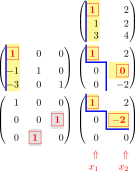

In [2]:
A = sym.Matrix([[1, 2], [1, 2], [3, 4]])
spec = la_figures.ge_tbl_spec(
    A,
    #pivoting="none",
    gj=False,
)
spec["outer_hspace_mm"] = 8
spec["cell_align"] = "r"

svg = grid_svg(**spec)
display(SVG(svg))

Note: RHS separators are now emitted via `spec["decorations"]` and `format_nrhs=False` so vertical lines stay inside matrix rows (label rows remain clean).

# RHS and Partial Pivoting
Augmented system with partial pivoting and callouts.


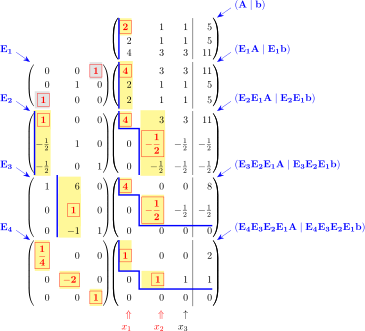

In [3]:
A = sym.Matrix([[2, 1, 1], [2, 1, 1], [4, 3, 3]])
rhs = sym.Matrix([[5], [5], [11]])
spec = la_figures.ge_tbl_spec(
    A,
    ref_rhs=rhs,
    pivoting="partial",
    gj=True,
    #show_pivots=True,
    array_names=["E", ["A", "b"]],
    callouts=True,
)
spec["outer_hspace_mm"] = 6
spec["cell_align"] = "r"
svg = grid_svg(**spec)
display(SVG(svg))

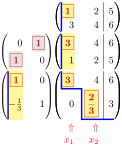

In [4]:
#Cell set 1 — show how decoration generation works

import sympy as sym
from IPython.display import SVG, display

import la_figures
from matrixlayout.ge import grid_svg

A = sym.Matrix([[1, 2], [3, 4]])
rhs = sym.Matrix([[5], [6]])

# Build the full bundle so you can inspect the decorations
bundle = la_figures.ge_tbl_bundle(A, ref_rhs=rhs, pivoting="partial", gj=False, show_pivots=True)

# Decorations are already computed in bundle["decor"]
bundle["decor"]

# Use the spec (already decorated) to render
spec = bundle["spec"]
svg = grid_svg(**spec, crop="tight", padding=(2, 2, 2, 2))
display(SVG(svg))

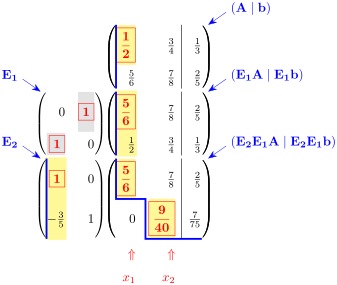

In [5]:
#Cell set 2 — Gaussian elimination on rational matrices

import sympy as sym
from IPython.display import SVG, display

import la_figures
from matrixlayout.ge import grid_svg

A = sym.Matrix([[sym.Rational(1, 2), sym.Rational(3, 4)],
              [sym.Rational(5, 6), sym.Rational(7, 8)]])
rhs = sym.Matrix([[sym.Rational(1, 3)], [sym.Rational(2, 5)]])

spec = la_figures.ge_tbl_spec(
  A,
  ref_rhs=rhs,
  pivoting="partial",
  gj=False,
  #show_pivots=True,
  array_names=["E", ["A", "b"]],
  row_stretch = 1.5, # improve row spacing
  fig_scale=1.3,
)

svg = grid_svg(**spec, crop="tight", padding=(2, 2, 2, 2))
display(SVG(svg))

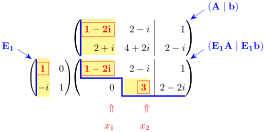

In [6]:
#Cell set 3 — complex matrices, and real matrices with rounding

import sympy as sym
from IPython.display import SVG, display

import la_figures
from matrixlayout.ge import grid_svg

# Complex example
A = sym.Matrix([[1-2*sym.I, 2 - sym.I],
              [2+sym.I, 4 + 2*sym.I]])
rhs = sym.Matrix([[1], [2 - sym.I]])

spec = la_figures.ge_tbl_spec(
  A,
  ref_rhs=rhs,
  pivoting="none",
  show_pivots=True,
  array_names=["E", ["A", "b"]],
  row_stretch = 1.5, # improve row spacing
)

def fmt(x): # simplify the terms
    if isinstance(x, sym.Basic):
        return sym.latex(sym.simplify(x))
    return str(x)

svg = grid_svg(**spec, crop="tight", padding=(2, 2, 2, 2), formatter=fmt)
display(SVG(svg))

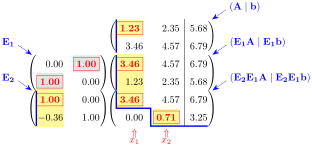

In [7]:
# Real example with rounding formatter
A = sym.Matrix([[1.23456, 2.34567],
              [3.45678, 4.56789]])
rhs = sym.Matrix([[5.6789], [6.7891]])

def round_fmt(x):
  try:
      return f"{float(sym.N(x)):.2f}"
  except Exception:
      return str(x)

spec = la_figures.ge_tbl_spec(
  A,
  ref_rhs=rhs,
  pivoting="partial",
  show_pivots=True,
  array_names=["E", ["A", "b"]],
  row_stretch = 1.5, # improve row spacing
)

# Override formatter at render-time
svg = grid_svg(**spec, formatter=round_fmt, crop="tight", padding=(2, 2, 2, 2))
display(SVG(svg))

# Inspect TeX/Artifacts
Use `output_dir` and `output_stem` to retain TeX/SVG artifacts for debugging.


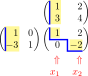

% -----------------------------------------------------------------------------
% GE template (layout-only)
% Target: current nicematrix (CodeBefore/Body/CodeAfter + \SubMatrix syntax)
% -----------------------------------------------------------------------------
\documentclass[notitlepage]{article


In [7]:
A = sym.Matrix([[1, 2], [3, 4]])
spec = la_figures.ge_tbl_spec(A, pivoting="none", gj=False, show_pivots=False)
svg = grid_svg(**spec, output_dir="tmp", output_stem="ge_basic")
display(SVG(svg))
with open("tmp/ge_basic.tex", "r" ) as f:
    print( f.read()[0:300] )

In [8]:
!rm tmp/*